## <strong> SPPnet 등장 배경 </strong>

ConvNet에 이미지를 입력하려면 이미지의 크기를 동일하게 맞춰야 한다. <br>
이때 crop 혹은 warp방식을 사용할 수 있지만 각각 단점이 존재한다.

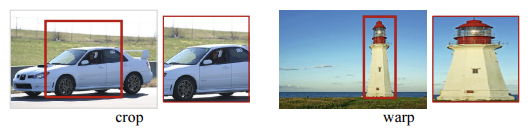

* crop: 이미지 정보 손실 (이미지의 일부만 CNN에 통과시키기 때문이다.) 
* warp: 이미지 변형 (기좀 가로세로비가 바뀌기 때문이다.)

SPPnet은 FC layer 이전에 **Spatial Pyramid Pooling layer**를 사용해 임의의 사이즈로 입력을 취할 수 있다. <br>
즉, 입력 사이즈가 제한되지 않으므로 입력 이미지를 crop/warp할 필요가 없다.

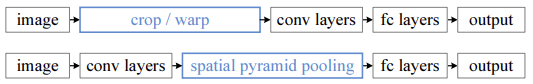


## <strong> SPPnet layers </strong>

SPPnet은 conv layer 5개, SPP layer, fc layer 3개로 구성된다. <br>
작동 방식은 다음과 같다.

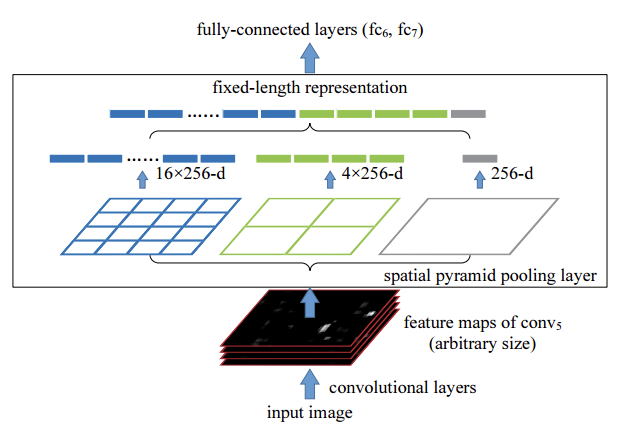



먼저 **spatial bins** 개수를 선정해야 한다. <br>
conv layer들을 거친 출력값이 나오면 각각의 pooling을 사용해 연산을 적용한다. <br>
위 그림의 경우 출력값에 pooling을 적용해 4×4, 2×2, 1×1의 크기로 출력한다. <br>
이때 총 원소의 개수는 16+4+1로 21개가 된다. <br>
이때 21이 spatial bins의 개수가 된다. <br>
위 4×4, 2×2, 1×1 출력을 fc layer를 위해 펴주게 되면 bins의 개수가 neuron의 개수가 된다.

입력 사이즈가 다양하므로 conv layers에서 출력하는 크기도 다양한다. <br>
따라서 각각 window size와 stride가 다르게 조정해줘야 한다. <br>
다음과 같은 수식을 사용하면 일정한 pyramid size를 얻을 수 있다.

* window size = ceil(feature map size/pooling size)
* stride = floor(feature map size/pooling size)

SPP layer를 거치면 (feature map 개수) * (bins 개수)의 차원을 가진다.

## <strong> SPP layer In Object Detection </strong>

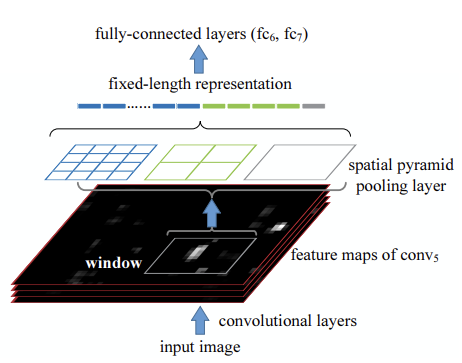

위 그림은 SPP layer를 Object Detection에 사용하는 그림이다. <br>
window로 표시된 부분이 Bounding box이다. <br>
즉, feature map에서 selective search를 사용해 bounding box을 추출한다. <br>
이후 모든 bounding box를 위에서 설명한 방식으로 특징을 동일한 크기로 출력한다. 

**R-CNN과 차이**

* R-CNN은 이미지당 2000개의 region proposal을 CNN에 적용한다. (시간이 오래 걸린다.)
* SPPnet은 CNN을 이미지에 한 번만 적용하면 된다. (속도가 빠르다.)